In [20]:
import pandas as pd
import numpy as np
import pymannkendall as mk
import geopandas as gpd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('prism_HUC12_monthly_stats.csv')

In [22]:
df

,Date,huc12,ppt,tmean,tmax,tmin
0,1999-01-01,170402080608,41.433598,-1.667952,2.283788,-5.619748
1,1999-01-01,170402080102,48.821302,-3.972876,0.210052,-8.156569
2,1999-01-01,170402080104,74.403680,-4.324542,-0.454682,-8.195282
3,1999-01-01,170402080106,48.247745,-3.894073,-0.009556,-7.779312
4,1999-01-01,170402080107,42.051995,-3.843079,0.539612,-8.226433
...,...,...,...,...,...,...
13795,2023-12-01,170402080401,50.891822,-3.001513,1.913050,-7.916269
13796,2023-12-01,170402080403,66.380330,-2.580569,1.997427,-7.158755
13797,2023-12-01,170402080205,45.494999,-4.415938,0.560666,-9.392782
13798,2023-12-01,170402080402,82.225289,-2.328479,1.861769,-6.518918


In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [24]:
def irr_year(df):
    """Convert month to irrigation year. This will rreturn month, calender year, and irrigation year"""
    # Irrigation year starts in Nov untill oct of next year and attributed by next year
    month = df['Date'].month
    if month >= 11:
        return month, df['Date'].year, df['Date'].year + 1
    else:
        return month, df['Date'].year, df['Date'].year

In [25]:
df[['month', 'year', 'irr_year']] = df.apply(irr_year, axis=1, result_type='expand') 

In [26]:
df[df['huc12'] == 170402080608].head(20)

,Date,huc12,ppt,tmean,tmax,tmin,month,year,irr_year
0,1999-01-01,170402080608,41.433598,-1.667952,2.283788,-5.619748,1,1999,1999
46,1999-02-01,170402080608,37.751370,-0.871061,3.804050,-5.546411,2,1999,1999
92,1999-03-01,170402080608,13.009748,3.518157,10.084871,-3.047872,3,1999,1999
138,1999-04-01,170402080608,39.861910,5.475074,11.915583,-0.964659,4,1999,1999
184,1999-05-01,170402080608,49.859845,10.176919,17.128987,3.225848,5,1999,1999
230,1999-06-01,170402080608,24.769152,15.333123,23.365528,7.301735,6,1999,1999
276,1999-07-01,170402080608,4.438445,19.544607,30.089320,9.000887,7,1999,1999
322,1999-08-01,170402080608,22.345945,19.870598,30.177184,9.564967,8,1999,1999
368,1999-09-01,170402080608,2.238664,13.365726,23.510879,3.221579,9,1999,1999
414,1999-10-01,170402080608,8.582254,8.889203,18.690713,-0.911270,10,1999,1999


In [27]:
df = df[df['irr_year'] >= 2000]

In [52]:
df_cs = df[df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # April to October
df_non_cs = df[~df['month'].isin([4, 5, 6, 7, 8, 9, 10])].copy() # November to March

In [40]:
#groupby irr year
df_irr_yr = df.groupby(['huc12', 'irr_year',]).agg(
    tmean = ('tmean', 'mean'), 
    tmax = ('tmax', 'mean'),
    tmin = ('tmin', 'mean'),
    ppt = ('ppt', 'sum'),
).reset_index()

In [41]:
df_irr_yr

,huc12,irr_year,tmean,tmax,tmin,ppt
0,170402080101,2000,7.037007,13.872620,0.201871,341.727780
1,170402080101,2001,5.984082,12.956754,-0.988350,237.636776
2,170402080101,2002,5.349412,12.095360,-1.396166,375.669252
3,170402080101,2003,7.173465,13.990665,0.356712,290.390829
4,170402080101,2004,5.811068,12.267213,-0.644660,522.744303
...,...,...,...,...,...,...
1145,170402080608,2020,8.313973,15.773109,0.854868,235.924768
1146,170402080608,2021,8.816786,16.116731,1.516914,250.441480
1147,170402080608,2022,8.082997,15.448691,0.717373,237.064162
1148,170402080608,2023,6.883224,13.548774,0.217720,384.367716


In [49]:
#sen slope
def analyze_trends(df, var_list=['ppt', 'tmean', 'tmax', 'tmin'], sort_yr = 'irr_year'):
    results = []

    for huc12, group in df.groupby('huc12'):
        group_sorted = group.sort_values(sort_yr)

        trend_data = {'huc12': huc12}

        for var in var_list:
            series = group_sorted[var].values

            try:
                result = mk.original_test(series)
                trend_data[f'{var}_slope'] = result.slope
                trend_data[f'{var}_p'] = result.p
                trend_data[f'{var}_trend'] = result.trend
            except Exception as e:
                trend_data[f'{var}_slope'] = None
                trend_data[f'{var}_p'] = None
                trend_data[f'{var}_trend'] = None

        results.append(trend_data)

    return pd.DataFrame(results)

In [50]:
trend_df = analyze_trends(df_irr_yr)

In [51]:
trend_df


,huc12,ppt_slope,ppt_p,ppt_trend,tmean_slope,tmean_p,tmean_trend,tmax_slope,tmax_p,tmax_trend,tmin_slope,tmin_p,tmin_trend
0,170402080101,4.762820,0.128996,no trend,-0.022585,0.559305,no trend,-0.042821,0.183112,no trend,0.009871,0.761422,no trend
1,170402080102,5.032789,0.141193,no trend,-0.024516,0.440876,no trend,-0.040702,0.215785,no trend,-0.000523,0.981367,no trend
2,170402080103,7.059818,0.252461,no trend,-0.041727,0.128996,no trend,-0.050128,0.042166,decreasing,-0.021285,0.315252,no trend
3,170402080104,6.852282,0.272343,no trend,-0.030838,0.315252,no trend,-0.037936,0.072124,no trend,-0.012499,0.623812,no trend
4,170402080105,4.410411,0.183112,no trend,-0.024314,0.528312,no trend,-0.039450,0.338288,no trend,0.004533,0.907038,no trend
5,170402080106,4.372565,0.272343,no trend,-0.030081,0.387514,no trend,-0.045878,0.215785,no trend,-0.013158,0.691342,no trend
6,170402080107,3.811993,0.198959,no trend,-0.026707,0.498219,no trend,-0.041602,0.272343,no trend,-0.007429,0.907038,no trend
7,170402080108,4.123677,0.198959,no trend,-0.029730,0.413686,no trend,-0.043568,0.315252,no trend,-0.006217,0.870137,no trend
8,170402080201,4.393104,0.168221,no trend,-0.028492,0.413686,no trend,-0.041711,0.154258,no trend,0.001065,0.907038,no trend
9,170402080202,4.304558,0.141193,no trend,-0.033691,0.440876,no trend,-0.049644,0.097277,no trend,0.004844,0.870137,no trend


In [53]:
#groupby cs in calender year
df_cs_yr = df_cs.groupby(['huc12', 'year',]).agg(
    tmean = ('tmean', 'mean'), 
    tmax = ('tmax', 'mean'),
    tmin = ('tmin', 'mean'),
    ppt = ('ppt', 'sum'),
).reset_index()

In [57]:
trend_cs = analyze_trends(df_cs_yr, sort_yr='year')

In [58]:
trend_cs

,huc12,ppt_slope,ppt_p,ppt_trend,tmean_slope,tmean_p,tmean_trend,tmax_slope,tmax_p,tmax_trend,tmin_slope,tmin_p,tmin_trend
0,170402080101,3.341979,0.172491,no trend,-0.007874,0.862156,no trend,-0.025699,0.441931,no trend,0.030016,0.118128,no trend
1,170402080102,3.444094,0.172491,no trend,-0.010069,0.637438,no trend,-0.025396,0.358743,no trend,0.020604,0.333358,no trend
2,170402080103,3.498291,0.172491,no trend,-0.029581,0.188633,no trend,-0.042084,0.188633,no trend,-0.016284,0.358743,no trend
3,170402080104,3.544208,0.264337,no trend,-0.022219,0.358743,no trend,-0.034283,0.333358,no trend,-0.002599,0.901298,no trend
4,170402080105,3.052537,0.188633,no trend,-0.005469,0.784970,no trend,-0.026021,0.333358,no trend,0.019688,0.286157,no trend
5,170402080106,3.203827,0.243693,no trend,-0.012708,0.602442,no trend,-0.024084,0.385310,no trend,0.011326,0.637438,no trend
6,170402080107,3.122609,0.224208,no trend,-0.012700,0.568338,no trend,-0.027892,0.286157,no trend,0.013798,0.413046,no trend
7,170402080108,2.867230,0.188633,no trend,-0.019011,0.358743,no trend,-0.034058,0.224208,no trend,0.010913,0.602442,no trend
8,170402080201,3.444203,0.143342,no trend,-0.011093,0.747106,no trend,-0.026071,0.385310,no trend,0.012316,0.503037,no trend
9,170402080202,3.319449,0.157406,no trend,-0.018567,0.413046,no trend,-0.042255,0.118128,no trend,0.023726,0.309163,no trend


<Axes: >

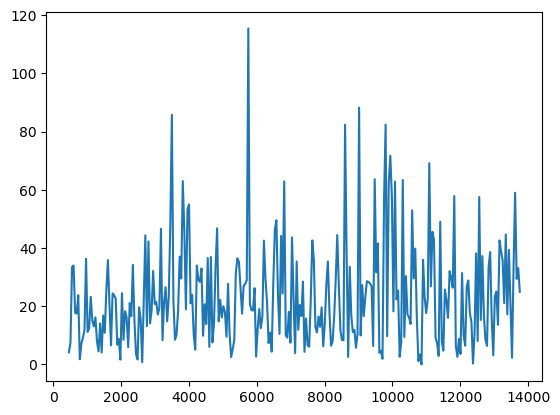

In [61]:
df[df['huc12'] == 170402080608]['ppt'].plot()

In [62]:
gdf = gpd.read_file('../portneuf_huc12/portneuf_huc12.shp')

In [63]:
# Make sure HUC12 in shapefile and trend_df match in type
gdf['huc12'] = gdf['huc12'].astype(str)
trend_df['huc12'] = trend_df['huc12'].astype(str)

In [64]:
merged_gdf = gdf.merge(trend_df, left_on='huc12', right_on='huc12')


In [66]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

def plot_trend_map(
    gdf,
    slope_col,
    pval_col,
    title="Trend Map",
    cbar_label="Sen's Slope",
    vmin=None,
    vmax=None,
    hatch_pattern='///',
    significance_level=0.05,
    figsize=(12, 8),
    cmap='coolwarm',
    save_path=None
):
    """
    Plot trend map with hatching for non-significant areas.

    Parameters:
        gdf: GeoDataFrame
        slope_col: column name for Sen's slope
        pval_col: column name for p-values
        title: plot title
        cbar_label: colorbar label
        vmin, vmax: for colormap normalization
        hatch_pattern: pattern for hatching (e.g., '///')
        significance_level: p-value threshold for significance
        save_path: if provided, saves the figure to file
    """
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # Determine significance
    sig_mask = gdf[pval_col] <= significance_level
    not_sig_mask = ~sig_mask

    # Color scale
    if vmin is not None and vmax is not None:
        norm = Normalize(vmin=vmin, vmax=vmax)
    else:
        norm = None

    # Base filled plot
    plot = gdf.plot(
        column=slope_col,
        cmap=cmap,
        linewidth=0.5,
        edgecolor='black',
        legend=True,
        ax=ax,
        norm=norm
    )

    # Hatching for non-significant polygons
    if not_sig_mask.any():
        gdf[not_sig_mask].plot(
            color='none',
            edgecolor='black',
            hatch=hatch_pattern,
            ax=ax
        )

    # Colorbar labeling
    cbar = plot.get_figure().get_axes()[-1]
    cbar.set_ylabel(cbar_label, fontsize=12)

    # Title and formatting
    ax.set_title(title, fontsize=16)
    ax.axis('off')
    plt.tight_layout()

    # Save if path is given
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Saved to {save_path}")

    plt.show()


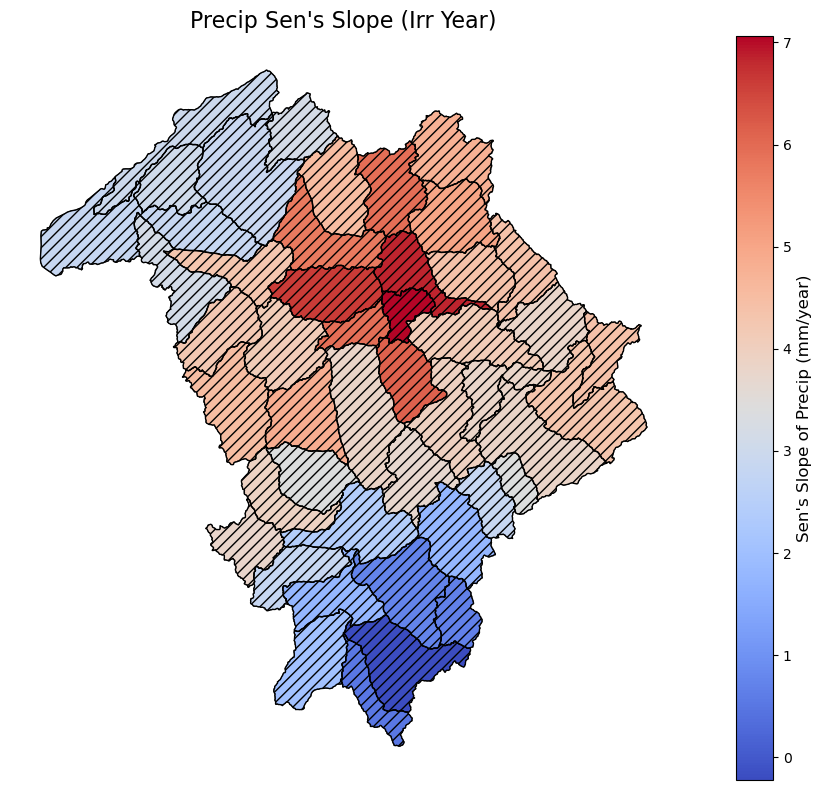

In [76]:
plot_trend_map(
    gdf=merged_gdf,
    slope_col='ppt_slope',
    pval_col='ppt_p',
    title="Precip Sen's Slope (Irr Year)",
    cbar_label="Sen's Slope of Precip (mm/year)",
    vmin=None,
    vmax=None,
    hatch_pattern='///',
    save_path=None #"etr_slope_irrigated_map.png"
)
